# SUDOKU

Łamigłówka, której celem jest wypełnienie diagramu 9 × 9 w taki sposób, aby w każdym wierszu, w każdej kolumnie i w każdym z dziewięciu pogrubionych kwadratów 3 × 3 (zwanych „blokami” lub „podkwadratami”) znalazło się po jednej cyfrze od 1 do 9.


Do rozwiązania problemu wykorzystano algorytm genetyczny.

In [115]:
import pygad
import random
import time

In [116]:
# rozwiązane sudoku

solved_sudoku_1 = [[4, 6, 9, 3, 8, 2, 1, 5, 7],
                   [2, 8, 1, 4, 7, 5, 3, 9, 6],
                   [7, 3, 5, 9, 1, 6, 2, 8, 4],
                   [5, 1, 3, 8, 9, 4, 6, 7, 2],
                   [6, 9, 4, 5, 2, 7, 8, 3, 1],
                   [8, 7, 2, 1, 6, 3, 5, 4, 9],
                   [1, 5, 8, 2, 4, 9, 7, 6, 3],
                   [9, 2, 6, 7, 3, 8, 4, 1, 5],
                   [3, 4, 7, 6, 5, 1, 9, 2, 8]]

solved_sudoku_2 = [[2, 9, 5, 4, 8, 1, 7, 3, 6],
                   [1, 4, 7, 6, 3, 9, 2, 8, 5],
                   [8, 3, 6, 7, 5, 2, 9, 4, 1],
                   [6, 8, 4, 5, 1, 7, 3, 9, 2],
                   [7, 5, 3, 9, 2, 8, 1, 6, 4],
                   [9, 1, 2, 3, 6, 4, 8, 5, 7],
                   [5, 6, 1, 2, 9, 3, 4, 7, 8],
                   [3, 7, 8, 1, 4, 6, 5, 2, 9],
                   [4, 2, 9, 8, 7, 5, 6, 1, 3]]

solved_sudoku_3 = [[6, 7, 1, 3, 5, 8, 2, 4, 9],
                   [8, 9, 3, 7, 4, 2, 6, 5, 1],
                   [2, 4, 5, 9, 6, 1, 8, 7, 3],
                   [4, 5, 9, 6, 7, 3, 1, 2, 8],
                   [3, 6, 8, 1, 2, 5, 7, 9, 4],
                   [7, 1, 2, 8, 9, 4, 3, 6, 5],
                   [9, 3, 4, 2, 1, 7, 5, 8, 6],
                   [1, 2, 6, 5, 8, 9, 4, 3, 7],
                   [5, 8, 7, 4, 3, 6, 9, 1, 2]]

solved_sudoku_list = [solved_sudoku_1, solved_sudoku_2, solved_sudoku_3]

In [117]:
#generowanie sudoku o określonej liczbie pustych pól

def generate_sudoku(solved, gaps):
    sudoku = [[0 for i in range(9)] for j in range(9)]
    for i in range(9):
        for j in range(9):
            sudoku[i][j] = solved[i][j]

    while gaps > 0:
        i = random.randint(0, 8)
        j = random.randint(0, 8)
        if sudoku[i][j] != 0:
            sudoku[i][j] = 0
            gaps -= 1

    return sudoku


# wybór sudoku do rozwiązania
selected_sudoku = random.choice(solved_sudoku_list)
generated_sudoku = generate_sudoku(selected_sudoku, 30)

for i in generated_sudoku:
    print(i)

[4, 6, 9, 3, 0, 0, 0, 5, 0]
[0, 8, 0, 4, 0, 5, 0, 9, 0]
[0, 3, 0, 9, 1, 6, 2, 8, 4]
[5, 0, 3, 8, 0, 4, 6, 7, 0]
[6, 0, 4, 0, 2, 0, 8, 3, 0]
[8, 0, 0, 1, 6, 3, 5, 0, 9]
[0, 0, 8, 2, 4, 9, 0, 6, 0]
[9, 2, 0, 7, 3, 8, 4, 0, 5]
[3, 4, 7, 0, 5, 0, 0, 2, 8]


In [118]:
# generowanie pustej planszy
def empty_board():
    return [[0 for i in range(9)] for j in range(9)]

# sprawdzanie ilości unikalnych wartości w wierszu
def check_row(board, row):
    return len(set(board[row]))

# sprawdzanie ilości unikalnych wartości w kolumnie
def check_col(board, col):
    column = [board[i][col] for i in range(9)]
    return len(set(column))

# sprawdzanie ilości unikalnych wartości w kwadracie 3x3
def check_box(board, row, col):
    box = [board[i][j] for i in range(row, row+3) for j in range(col, col+3)]
    return len(set(box))

# wypełnianie sudoku wartościami z rozwiązania
def fill_in(solution):
    filled_sudoku = empty_board()
    sol_index = 0
    for i in range(9):
        for j in range(9):
            if generated_sudoku[i][j] != 0:
                filled_sudoku[i][j] = int(generated_sudoku[i][j])
            else:
                filled_sudoku[i][j] = int(solution[sol_index])
                sol_index += 1
    return filled_sudoku
    

In [119]:
#definiowanie parametrów chromosomu
gene_space = [1, 2, 3, 4, 5, 6, 7, 8, 9] 

In [120]:
#definiowanie funkcji fitness
def fitness_func(solution, solution_idx):
    filled_sudoku = fill_in(solution)
    fitness = 0
    for i in range(9):
        fitness += check_row(filled_sudoku, i)
        fitness += check_col(filled_sudoku, i)
    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            fitness += check_box(filled_sudoku, i, j)
    return fitness

fitness_function = fitness_func

In [121]:
#definiowanie funkcji liczącej ilość genów
def genes_number(sudoku):
    genes = 0
    for i in range(9):
        for j in range(9):
            if sudoku[i][j] == 0:
                genes += 1
    return genes

In [122]:
#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 400
num_genes = genes_number(generated_sudoku)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = sol_per_pop // 2
num_generations = 5000
keep_parents = sol_per_pop // 13

#typ selekcji rodzicow
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
mutation_type = "random"
mutation_percent_genes = 2

In [123]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria=["reach_243", "saturate_200"]
                    )

#uruchomienie algorytmu
start_time = time.time()
ga_instance.run()
end_time = time.time()
time_passed = end_time - start_time

Parameters of the best solution: [8. 2. 1. 7. 2. 1. 7. 3. 6. 7. 5. 9. 9. 1. 1. 5. 7. 2. 7. 2. 4. 1. 5. 7.
 3. 6. 1. 6. 1. 9.]
Fitness value of the best solution (solved=243) = 241
Number of generations passed is 249
Time passed: 19.840336322784424

Best solution found is:
[4, 6, 9, 3, 8, 2, 1, 5, 7]
[2, 8, 1, 4, 7, 5, 3, 9, 6]
[7, 3, 5, 9, 1, 6, 2, 8, 4]
[5, 9, 3, 8, 9, 4, 6, 7, 1]
[6, 1, 4, 5, 2, 7, 8, 3, 2]
[8, 7, 2, 1, 6, 3, 5, 4, 9]
[1, 5, 8, 2, 4, 9, 7, 6, 3]
[9, 2, 6, 7, 3, 8, 4, 1, 5]
[3, 4, 7, 6, 5, 1, 9, 2, 8]

Correct solution is:
[4, 6, 9, 3, 8, 2, 1, 5, 7]
[2, 8, 1, 4, 7, 5, 3, 9, 6]
[7, 3, 5, 9, 1, 6, 2, 8, 4]
[5, 1, 3, 8, 9, 4, 6, 7, 2]
[6, 9, 4, 5, 2, 7, 8, 3, 1]
[8, 7, 2, 1, 6, 3, 5, 4, 9]
[1, 5, 8, 2, 4, 9, 7, 6, 3]
[9, 2, 6, 7, 3, 8, 4, 1, 5]
[3, 4, 7, 6, 5, 1, 9, 2, 8]


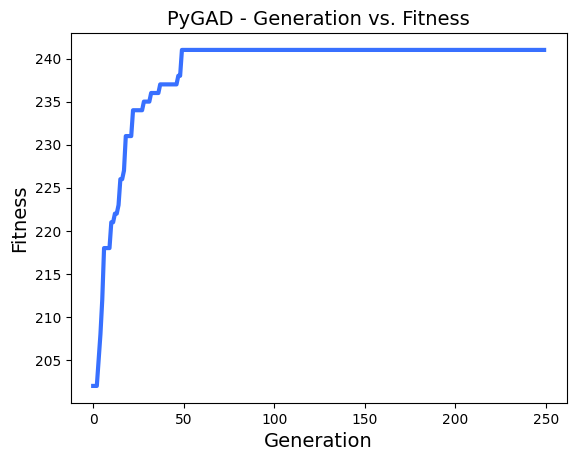

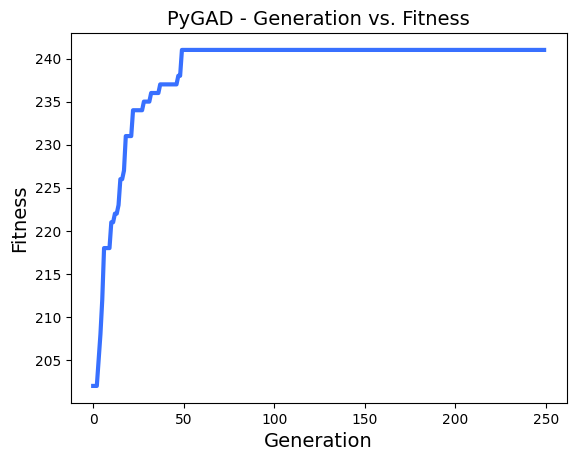

In [124]:
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution (solved=243) = {solution_fitness}".format(solution_fitness=solution_fitness))

#liczba generacji algorytmu
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

#czas trwania algorytmu
print("Time passed: {time_passed}".format(time_passed=time_passed) + "\n")

#wyswietlenie najlepszego znalezionego rozwiazania
print("Best solution found is:")
for i in fill_in(solution):
    print(i)
print("")

#porownanie z prawidlowym rozwiazaniem
print("Correct solution is:")
for i in selected_sudoku:
    print(i)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

In [125]:

# sprawdzenie efektywnosci algorytmu dla malych sudoku
small_solved_cases = 0
small_avg_time = 0
for i in range(100):
    selected_sudoku = random.choice(solved_sudoku_list)
    generated_sudoku = generate_sudoku(selected_sudoku, 10)
    num_genes = genes_number(generated_sudoku)
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=["reach_243", "saturate_200"]
                        )
    #uruchomienie algorytmu
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 243:
        small_solved_cases += 1
        small_avg_time += end_time - start_time

print("Small solved cases: ", small_solved_cases)
if small_solved_cases != 0:
    print("Small avg time: ", small_avg_time / small_solved_cases)


Small solved cases:  100
Small avg time:  0.9638094091415406


Small solved cases: 100

Small avg time: 0.9638094091415406

In [126]:
# sprawdzenie efektywnosci algorytmu dla srednich sudoku
medium_solved_cases = 0
medium_avg_time = 0
for i in range(100):
    selected_sudoku = random.choice(solved_sudoku_list)
    generated_sudoku = generate_sudoku(selected_sudoku, 20)
    num_genes = genes_number(generated_sudoku)
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=["reach_243", "saturate_200"]
                        )
    #uruchomienie algorytmu
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 243:
        medium_solved_cases += 1
        medium_avg_time += end_time - start_time

print("Medium solved cases: ", medium_solved_cases)
if medium_solved_cases != 0:
    print("Medium avg time: ", medium_avg_time / medium_solved_cases)

Medium solved cases:  99
Medium avg time:  2.701251234671082


Medium solved cases: 99

Medium avg time: 2.701251234671082

In [127]:
# sprawdzenie efektywnosci algorytmu dla duzych sudoku
big_solved_cases = 0
big_avg_time = 0
for i in range(100):
    selected_sudoku = random.choice(solved_sudoku_list)
    generated_sudoku = generate_sudoku(selected_sudoku, 30)
    num_genes = genes_number(generated_sudoku)
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=["reach_243", "saturate_200"]
                        )
    #uruchomienie algorytmu
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 243:
        big_solved_cases += 1
        big_avg_time += end_time - start_time

print("Big solved cases: ", big_solved_cases)
if big_solved_cases != 0:
    print("Big avg time: ", big_avg_time / big_solved_cases)

Big solved cases:  86
Big avg time:  5.717752026957135


Big solved cases: 86

Big avg time: 5.717752026957135

### Drugie rozwiązanie problemu przy pomocy algorytmu genetycznego z wykorzystaniem innej funkcji fitness

In [131]:
#ilosc unikalnych wierszy w sudoku
def unique_rows(sudoku):
    counter = 0
    for i in range(9):
        if len(set(sudoku[i])) == 9:
            counter += 1
    return counter

#ilosc unikalnych kolumn w sudoku
def unique_columns(sudoku):
    counter = 0
    for i in range(9):
        column = []
        for j in range(9):
            column.append(sudoku[j][i])
        if len(set(column)) == 9:
            counter += 1
    return counter

#ilosc unikalnych kwadratow 3x3 w sudoku
def unique_squares(sudoku):
    counter = 0
    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            square = []
            for k in range(3):
                for l in range(3):
                    square.append(sudoku[i + k][j + l])
            if len(set(square)) == 9:
                counter += 1
    return counter

In [132]:
# nowa funkcja fitness
def new_fitness_function(solution, solution_idx):
    sudoku = fill_in(solution)
    return unique_rows(sudoku) + unique_columns(sudoku) + unique_squares(sudoku)

fitness_function = new_fitness_function

In [133]:
# wybor sudoku
selected_sudoku = random.choice(solved_sudoku_list)
generated_sudoku = generate_sudoku(selected_sudoku, 30)
num_genes = genes_number(generated_sudoku)

for i in generated_sudoku:
    print(i)

[6, 0, 0, 3, 5, 8, 2, 4, 9]
[8, 9, 3, 7, 4, 2, 6, 0, 1]
[2, 4, 0, 0, 6, 0, 8, 0, 0]
[4, 5, 9, 0, 7, 0, 1, 2, 0]
[3, 0, 8, 0, 2, 5, 7, 0, 4]
[7, 1, 2, 8, 0, 4, 0, 0, 5]
[0, 3, 4, 0, 1, 0, 5, 0, 6]
[1, 2, 0, 0, 8, 0, 4, 0, 7]
[0, 8, 0, 4, 0, 6, 0, 1, 0]


In [134]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria=["reach_27", "saturate_200"]
                    )

#uruchomienie algorytmu
start_time = time.time()
ga_instance.run()
end_time = time.time()
time_passed = end_time - start_time

C:\Users\szymo\AppData\Roaming\Python\Python311\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=2) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Parameters of the best solution: [7. 1. 5. 5. 1. 9. 3. 7. 9. 6. 4. 6. 1. 9. 3. 9. 6. 9. 2. 8. 7. 7. 3. 5.
 8. 5. 6. 9. 3. 3.]
Fitness value of the best solution (solved=243) = 18
Number of generations passed is 251
Time passed: 25.665995836257935

Best solution found is:
[6, 7, 1, 3, 5, 8, 2, 4, 9]
[8, 9, 3, 7, 4, 2, 6, 5, 1]
[2, 4, 5, 1, 6, 9, 8, 3, 7]
[4, 5, 9, 9, 7, 6, 1, 2, 4]
[3, 6, 8, 1, 2, 5, 7, 9, 4]
[7, 1, 2, 8, 3, 4, 9, 6, 5]
[9, 3, 4, 2, 1, 8, 5, 7, 6]
[1, 2, 7, 3, 8, 5, 4, 8, 7]
[5, 8, 6, 4, 9, 6, 3, 1, 3]

Correct solution is:
[6, 7, 1, 3, 5, 8, 2, 4, 9]
[8, 9, 3, 7, 4, 2, 6, 5, 1]
[2, 4, 5, 9, 6, 1, 8, 7, 3]
[4, 5, 9, 6, 7, 3, 1, 2, 8]
[3, 6, 8, 1, 2, 5, 7, 9, 4]
[7, 1, 2, 8, 9, 4, 3, 6, 5]
[9, 3, 4, 2, 1, 7, 5, 8, 6]
[1, 2, 6, 5, 8, 9, 4, 3, 7]
[5, 8, 7, 4, 3, 6, 9, 1, 2]


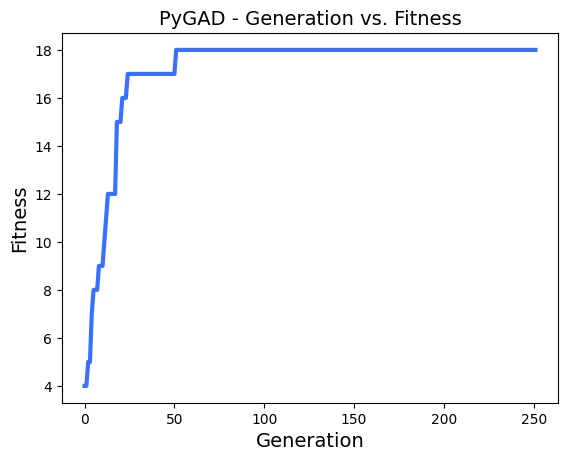

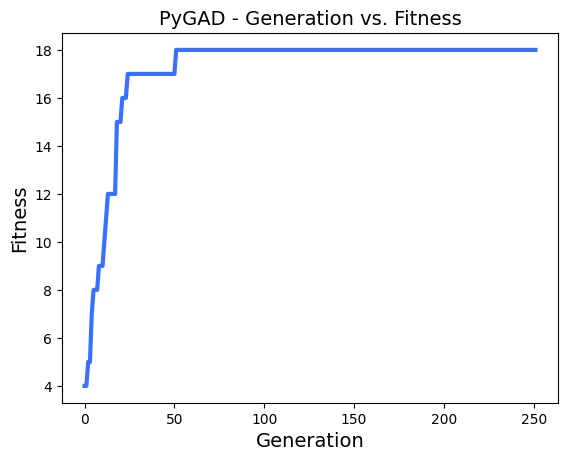

In [135]:
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution (solved=27) = {solution_fitness}".format(solution_fitness=solution_fitness))

#liczba generacji algorytmu
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

#czas wykonania algorytmu
print("Time passed: {time_passed}".format(time_passed=time_passed) + "\n")

#najlepsze znalezione rozwiazanie
print("Best solution found is:")
for i in fill_in(solution):
    print(i)
print("")

#poprawne rozwiazanie
print("Correct solution is:")
for i in selected_sudoku:
    print(i)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

In [136]:
# sprawdzenie efektywnosci algorytmu dla malych sudoku
small_solved_cases = 0
small_avg_time = 0
for i in range(100):
    selected_sudoku = random.choice(solved_sudoku_list)
    generated_sudoku = generate_sudoku(selected_sudoku, 10)
    num_genes = genes_number(generated_sudoku)
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=["reach_27", "saturate_200"]
                        )
    #uruchomienie algorytmu
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 27:
        small_solved_cases += 1
        small_avg_time += end_time - start_time

print("Small solved cases: ", small_solved_cases)
if small_solved_cases != 0:
    print("Small avg time: ", small_avg_time / small_solved_cases)

C:\Users\szymo\AppData\Roaming\Python\Python311\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=2) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Small solved cases:  100
Small avg time:  1.023431544303894


Small solved cases: 100

Small avg time: 1.023431544303894

In [137]:
# sprawdzenie efektywnosci algorytmu dla srednich sudoku
medium_solved_cases = 0
medium_avg_time = 0
for i in range(100):
    selected_sudoku = random.choice(solved_sudoku_list)
    generated_sudoku = generate_sudoku(selected_sudoku, 20)
    num_genes = genes_number(generated_sudoku)
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=["reach_27", "saturate_200"]
                        )
    #uruchomienie algorytmu
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 27:
        medium_solved_cases += 1
        medium_avg_time += end_time - start_time

print("Medium solved cases: ", medium_solved_cases)
if medium_solved_cases != 0:
    print("Medium avg time: ", medium_avg_time / medium_solved_cases)

Medium solved cases:  96
Medium avg time:  4.133039007584254


Medium solved cases:  96

Medium avg time:  4.133039007584254

In [138]:
# sprawdzenie efektywnosci algorytmu dla duzych sudoku
big_solved_cases = 0
big_avg_time = 0
for i in range(100):
    selected_sudoku = random.choice(solved_sudoku_list)
    generated_sudoku = generate_sudoku(selected_sudoku, 30)
    num_genes = genes_number(generated_sudoku)
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=["reach_27", "saturate_200"]
                        )
    #uruchomienie algorytmu
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 27:
        big_solved_cases += 1
        big_avg_time += end_time - start_time

print("Big solved cases: ", big_solved_cases)
if big_solved_cases != 0:
    print("Big avg time: ", big_avg_time / big_solved_cases)

Big solved cases:  40
Big avg time:  11.377614229917526


Big solved cases:  40

Big avg time:  11.377614229917526

# PODSUMOWANIE

Algorytm genetyczny w miarę dobrze sprawdza się w przypadku sudoku. Niestety problem ten jest bardzo złożony, gdyż mamy do czynienia z dużą ilością możliwych rozwiązań. Dla każdego pustego pola istnieje aż 9 kombinacji cyfr, które mogą się w nim znaleźć. Z każdym kolejnym polem ilość możliwych rozwizać znacząco rośnie co powoduje wydłużenie czasu działania algorytmu, a dla bardzo dużych łamigłówek rozwiązania często są błędne. 


Pierwsza funkcja fitness sprawdza sumę unikalnych cyfr w każdym wierszu, kolumnie i kwadracie. Najkorzystniejszą wartością w tym przypadku jest 243, co jest równoważne z rozwiązaniem sudoku.


Druga funckja fitness sprawdza sumę unikalnych wierszy, kolumn i kwadratów. Najkorzystniejszą wartością w tym przypadku jest 27, co jest równoważne z rozwiązaniem sudoku.


Wyniki pierwszej funkcji są znacznie bardziej precyzyjne i rozwiązania są szybciej odnajdowane.


### BIBLIOGRAFIA

https://pl.wikipedia.org/wiki/Sudoku

https://pygad.readthedocs.io/en/latest/

